In [1]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from noiseestimator import NoiseEstimator

In [2]:
data = ADME(name = 'Caco2_Wang')
data.get_data()

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000
3,creatinine,CN1CC(=O)NC1=N,-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000
...,...,...,...
905,Capric acid (decanoic acid),CCCCCCCCCC(=O)O,-4.680000
906,Apometzgerin (2),COc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc(O)c1OC,-4.950000
907,3,COC(=O)C[C@@H](C(=O)NN(Cc1ccc(/C=C\c2ccccc2)cc...,-5.080000
908,51d,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)NS(=...,-5.300000


In [3]:
data_range = data.y.max() - data.y.min()
print(data_range)

4.250000200000001


In [5]:
data.y.to_csv('../data/processed/caco2.csv', index=False)

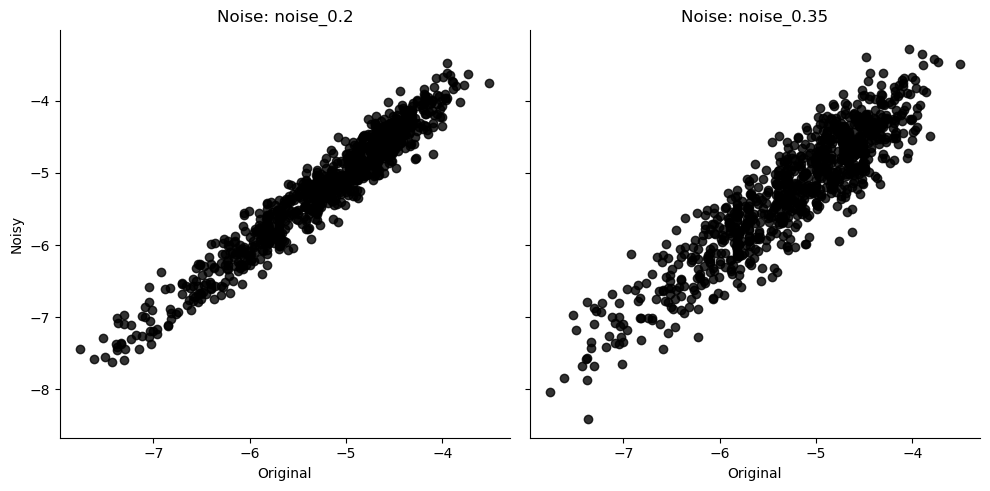

In [3]:
NE = NoiseEstimator(data.y, [0.2, 0.35])
NE.plot()

<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

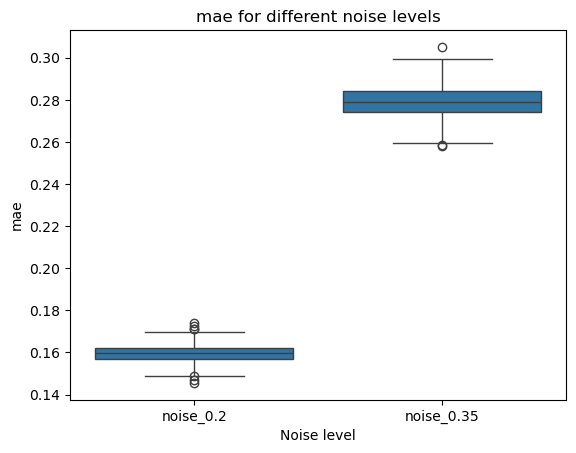

In [4]:
NE.plot_bootstrap(metric='mae')

In [5]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.2,0.159532,0.039986,0.199911,0.933735,0.968485
noise_0.35,0.279050,0.122369,0.349718,0.797212,0.911797


<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

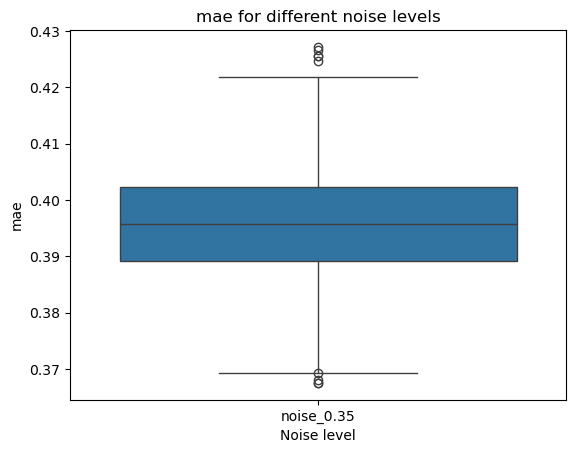

In [6]:
NE = NoiseEstimator(data.y, 0.35, 0.35)
NE.plot_bootstrap(metric='mae')

In [7]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.35,0.395582,0.245979,0.495824,0.661505,0.831162


In [8]:
NE.noise_bootstraps.mae.to_csv('../data/interim/Caco2_mae.csv')